In [1]:
import os
import random

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import seaborn as sns
import requests
import urllib.request, json
import openpyxl
import random

folder = 'C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\01 Data\load_profiles'
os.chdir(folder)

## FFE: Industry load profiles

In [4]:
# read in data
link = "http://opendata.ffe.de:3000/v_opendata?id_opendata=eq.59"
with urllib.request.urlopen(link) as url:
    data = json.loads(url.read())
    #print(data)

In [124]:
# create industry classification dict
industry_classifications = data[0]['oep_metadata']['resources'][0]['schema']['fields'][9]['description'].split(
    'internal_id[1] = ')[1:]
industry_classifications = [i.split(',')[0] for i in industry_classifications]
industry_codes = [i.split(':')[0] for i in industry_classifications]
industry_names = [i.split(': ')[1] for i in industry_classifications]
classification_dict = {industry_codes[i]: industry_names[i] for i in range(len(industry_names))}
#classification_dict

In [125]:
# create industry load profile dataframe
data_dict = {}
for datapoint in data[0]['data']:
    industry_id = datapoint['internal_id_1']
    data_dict[classification_dict[str(industry_id)]] = datapoint['values']
df = pd.DataFrame(data_dict)
df

,Transport Equipment,Mining and Quarrying,Food and Tabacco,Machinery,Wood and Wood Products,Construction,Textile and Leather,Iron & steel industry,Non-metallic Minerals,Non-specified (Industry),Paper
0,0.000057,0.000023,0.000065,0.000057,0.000055,0.000055,0.000055,0.000113,0.000082,0.000055,0.000113
1,0.000056,0.000023,0.000066,0.000056,0.000054,0.000054,0.000054,0.000113,0.000082,0.000054,0.000113
2,0.000056,0.000022,0.000065,0.000056,0.000053,0.000053,0.000053,0.000114,0.000080,0.000053,0.000114
3,0.000056,0.000022,0.000064,0.000056,0.000054,0.000054,0.000054,0.000117,0.000078,0.000054,0.000117
4,0.000056,0.000022,0.000066,0.000056,0.000053,0.000053,0.000053,0.000116,0.000078,0.000053,0.000116
...,...,...,...,...,...,...,...,...,...,...,...
8755,0.000061,0.000022,0.000078,0.000061,0.000051,0.000051,0.000051,0.000111,0.000072,0.000051,0.000111
8756,0.000067,0.000023,0.000080,0.000067,0.000057,0.000057,0.000057,0.000117,0.000073,0.000057,0.000117
8757,0.000075,0.000023,0.000084,0.000075,0.000074,0.000074,0.000074,0.000114,0.000076,0.000074,0.000114
8758,0.000081,0.000025,0.000085,0.000081,0.000078,0.000078,0.000078,0.000111,0.000078,0.000078,0.000111


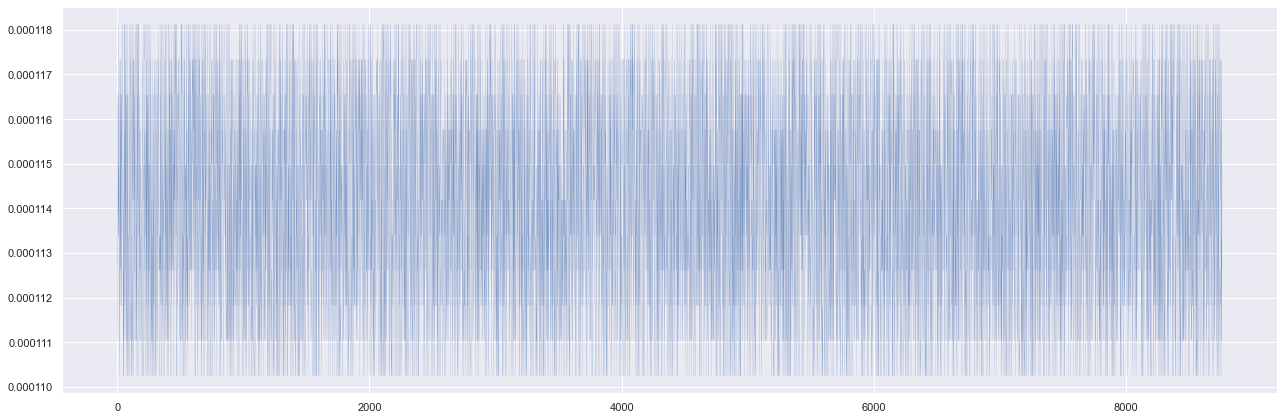

In [126]:
# plot one industry
fig, ax = plt.subplots(figsize=(18, 6))
ax = plt.plot(df.Paper, linewidth=.1)
plt.tight_layout()

In [120]:
# save industry dataframe to xlsx
os.chdir(ffe_folder)
df.to_excel('FFE_industry_load_profiles.xlsx')

---

## FFE: Synthetic household EV profiles

In [2]:
# read in data
link = 'https://opendata.ffe.de/api/od/v_opendata?id_opendata=eq.23'
with urllib.request.urlopen(link) as url:
    data = json.loads(url.read())

In [3]:
data

[{'id_opendata': 23,
  'title': 'Synthetic Sample Mobility Profile by Household Types',
  'oep_metadata': {'name': 'id_opendata=23',
   'title': 'Synthetic Sample Mobility Profile by household types',
   'description': 'These synthetic mobility profiles were generated by an integrated simulation model for load and mobility profiles of private households developed at FfE. Households with an average electric consumption were selected as examples for major household types from a simulated settlement of 940 households representative for Germany. Care was also taken to ensure that thermal consumption and annual kilometrage were as average as possible. The period is one year and the temporal resolution is one minute. The data set consists of the following profiles:\n* Location profile: A location is assigned to the vehicle of the household at every time step.\n* Consumption_profile: The consumption of a drive is entered in the first time step of the drive\n* Kilometrage_profile: The kilometr

In [13]:
data[0]['data'][1]

{'id_opendata': 23,
 'id_region_type': 35,
 'region_type': 'NUTS-0',
 'id_region': 276,
 'region': 'Germany',
 'year': None,
 'year_weather': 2015,
 'internal_id': [2, 1],
 'internal_id_1': 2,
 'internal_id_2': 1,
 'internal_id_3': None,
 'internal_id_4': None,
 'value': None,
 'values': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [4]:
# separate data arrays by mobility type
location = [d for d in data[0]['data'] if d['internal_id_2'] == 1]
consumption = [d for d in data[0]['data'] if d['internal_id_2'] == 2]
kilometrage = [d for d in data[0]['data'] if d['internal_id_2'] == 3]
# create empty df with multiindex (profile, mobility type)
ind = pd.MultiIndex.from_product([list(range(1, 12)), ['location', 'consumption', 'kilometrage']])
df = pd.DataFrame(index=ind).T

In [5]:
# read out profiles and insert into df
for i in range(1, 12):
    df[i, 'location'] = [d['values'] for d in location if d['internal_id_1'] == i][0]
    df[i, 'consumption'] = [d['values'] for d in consumption if d['internal_id_1'] == i][0]
    df[i, 'kilometrage'] = [d['values'] for d in kilometrage if d['internal_id_1'] == i][0]

ind_2 = pd.date_range('2019-01-01 00:00', '2019-12-31 23:59', freq='1min')
df_2 = df
df_2.index = ind_2
df_2

1                                2               \
                    location consumption kilometrage location consumption   
2019-01-01 00:00:00        1         0.0         0.0        1         0.0   
2019-01-01 00:01:00        1         0.0         0.0        1         0.0   
2019-01-01 00:02:00        1         0.0         0.0        1         0.0   
2019-01-01 00:03:00        1         0.0         0.0        1         0.0   
2019-01-01 00:04:00        1         0.0         0.0        1         0.0   
...                      ...         ...         ...      ...         ...   
2019-12-31 23:55:00        1         0.0         0.0        1         0.0   
2019-12-31 23:56:00        1         0.0         0.0        1         0.0   
2019-12-31 23:57:00        1         0.0         0.0        1         0.0   
2019-12-31 23:58:00        1         0.0         0.0        1         0.0   
2019-12-31 23:59:00        1         0.0         0.0        1         0.0   

                                      3                                4   \
                    kilometrage location consumption kilometrage location   
2019-01-01 00:00:00         0.0        1         0.0         0.0        1   
2019-01-01 00:01:00         0.0        1         0.0         0.0        1   
2019-01-01 00:02:00         0.0        1         0.0         0.0        1   
2019-01-01 00:03:00         0.0        1         0.0         0.0        1   
2019-01-01 00:04:00         0.0        1         0.0         0.0        1   
...                         ...      ...         ...         ...      ...   
2019-12-31 23:55:00         0.0        1         0.0         0.0        1   
2019-12-31 23:56:00         0.0        1         0.0         0.0        1   
2019-12-31 23:57:00         0.0        1         0.0         0.0        1   
2019-12-31 23:58:00         0.0        1         0.0         0.0        1   
2019-12-31 23:59:00         0.0        1         0.0         0.0        1   

                     ...          8        9                           \
                     ... kilometrage location consumption kilometrage   
2019-01-01 00:00:00  ...         0.0        1         0.0         0.0   
2019-01-01 00:01:00  ...         0.0        1         0.0         0.0   
2019-01-01 00:02:00  ...         0.0        1         0.0         0.0   
2019-01-01 00:03:00  ...         0.0        1         0.0         0.0   
2019-01-01 00:04:00  ...         0.0        1         0.0         0.0   
...                  ...         ...      ...         ...         ...   
2019-12-31 23:55:00  ...         0.0        1         0.0         0.0   
2019-12-31 23:56:00  ...         0.0        1         0.0         0.0   
2019-12-31 23:57:00  ...         0.0        1         0.0         0.0   
2019-12-31 23:58:00  ...         0.0        1         0.0         0.0   
2019-12-31 23:59:00  ...         0.0        1         0.0         0.0   

                          10                               11              \
                    location consumption kilometrage location consumption   
2019-01-01 00:00:00        1         0.0         0.0        1         0.0   
2019-01-01 00:01:00        1         0.0         0.0        1         0.0   
2019-01-01 00:02:00        1         0.0         0.0        1         0.0   
2019-01-01 00:03:00        1         0.0         0.0        1         0.0   
2019-01-01 00:04:00        1         0.0         0.0        1         0.0   
...                      ...         ...         ...      ...         ...   
2019-12-31 23:55:00        1         0.0         0.0        1         0.0   
2019-12-31 23:56:00        1         0.0         0.0        1         0.0   
2019-12-31 23:57:00        1         0.0         0.0        1         0.0   
2019-12-31 23:58:00        1         0.0         0.0        1         0.0   
2019-12-31 23:59:00        1         0.0         0.0        1         0.0   

                                 
                    kilometrage  
20

In [19]:
df

1                                2               \
                    location consumption kilometrage location consumption   
2019-01-01 00:00:00        1         0.0         0.0        1         0.0   
2019-01-01 00:01:00        1         0.0         0.0        1         0.0   
2019-01-01 00:02:00        1         0.0         0.0        1         0.0   
2019-01-01 00:03:00        1         0.0         0.0        1         0.0   
2019-01-01 00:04:00        1         0.0         0.0        1         0.0   
...                      ...         ...         ...      ...         ...   
2019-12-31 23:55:00        1         0.0         0.0        1         0.0   
2019-12-31 23:56:00        1         0.0         0.0        1         0.0   
2019-12-31 23:57:00        1         0.0         0.0        1         0.0   
2019-12-31 23:58:00        1         0.0         0.0        1         0.0   
2019-12-31 23:59:00        1         0.0         0.0        1         0.0   

                                      3                                4   \
                    kilometrage location consumption kilometrage location   
2019-01-01 00:00:00         0.0        1         0.0         0.0        1   
2019-01-01 00:01:00         0.0        1         0.0         0.0        1   
2019-01-01 00:02:00         0.0        1         0.0         0.0        1   
2019-01-01 00:03:00         0.0        1         0.0         0.0        1   
2019-01-01 00:04:00         0.0        1         0.0         0.0        1   
...                         ...      ...         ...         ...      ...   
2019-12-31 23:55:00         0.0        1         0.0         0.0        1   
2019-12-31 23:56:00         0.0        1         0.0         0.0        1   
2019-12-31 23:57:00         0.0        1         0.0         0.0        1   
2019-12-31 23:58:00         0.0        1         0.0         0.0        1   
2019-12-31 23:59:00         0.0        1         0.0         0.0        1   

                     ...          8        9                           \
                     ... kilometrage location consumption kilometrage   
2019-01-01 00:00:00  ...         0.0        1         0.0         0.0   
2019-01-01 00:01:00  ...         0.0        1         0.0         0.0   
2019-01-01 00:02:00  ...         0.0        1         0.0         0.0   
2019-01-01 00:03:00  ...         0.0        1         0.0         0.0   
2019-01-01 00:04:00  ...         0.0        1         0.0         0.0   
...                  ...         ...      ...         ...         ...   
2019-12-31 23:55:00  ...         0.0        1         0.0         0.0   
2019-12-31 23:56:00  ...         0.0        1         0.0         0.0   
2019-12-31 23:57:00  ...         0.0        1         0.0         0.0   
2019-12-31 23:58:00  ...         0.0        1         0.0         0.0   
2019-12-31 23:59:00  ...         0.0        1         0.0         0.0   

                          10                               11              \
                    location consumption kilometrage location consumption   
2019-01-01 00:00:00        1         0.0         0.0        1         0.0   
2019-01-01 00:01:00        1         0.0         0.0        1         0.0   
2019-01-01 00:02:00        1         0.0         0.0        1         0.0   
2019-01-01 00:03:00        1         0.0         0.0        1         0.0   
2019-01-01 00:04:00        1         0.0         0.0        1         0.0   
...                      ...         ...         ...      ...         ...   
2019-12-31 23:55:00        1         0.0         0.0        1         0.0   
2019-12-31 23:56:00        1         0.0         0.0        1         0.0   
2019-12-31 23:57:00        1         0.0         0.0        1         0.0   
2019-12-31 23:58:00        1         0.0         0.0        1         0.0   
2019-12-31 23:59:00        1         0.0         0.0        1         0.0   

                                 
                    kilometrage  
20

In [10]:
ind = pd.MultiIndex.from_product([list(range(1, 12)), ['location', 'consumption']])
dff = pd.DataFrame(index=ind).T
dff

Empty DataFrame
Columns: [(1, location), (1, consumption), (2, location), (2, consumption), (3, location), (3, consumption), (4, location), (4, consumption), (5, location), (5, consumption), (6, location), (6, consumption), (7, location), (7, consumption), (8, location), (8, consumption), (9, location), (9, consumption), (10, location), (10, consumption), (11, location), (11, consumption)]
Index: []

[0 rows x 22 columns]

In [15]:
[i if i == 1 else 0 for i in df[1, 'location'][::15]]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [21]:
ind = pd.date_range('2019-01-01 00:00', '2019-12-31 23:45', freq='15min')
df_out = pd.DataFrame(index=ind)

# column names setup
household_types = ['One full-time working person', 'One pensioneer', 'Two full-time working persons', 'Two pensioneers',
                   'One full-time and one part-time working person', 'Two full-time working persons, one child',
                   'One full-time and one part-time working person, one child',
                   'Two full-time working persons, two children',
                   'One full-time and one part-time working person, two children',
                   'Two full-time working persons, three children',
                   'One full-time and one part-time working person, three children']
household_types = [i.replace(' ', '_') for i in household_types]

for j, hh_type in enumerate(household_types, start=1):
    # extract drives where ev location was 1 (at home) before
    d_j = [[i, df[j, 'consumption'][i]] for i in range(10, len(df)) if df[j, 'consumption'][i] > 0 if
     df[j, 'location'][i - 10] == 1]
    d_j_df = pd.DataFrame(d_j, columns=['time', 'consumption kWh']).set_index('time').reindex(range(0, len(df)), fill_value=0)
    # aggregate data from minute to quarterly hour and append to df_out
    data_j = [np.sum(d_j_df['consumption kWh'][i:i + 15]) for i in range(0, len(d_j_df), 15)]
    df_out['consumption_'+hh_type] = data_j
    # extract location at every 15th minute: 1 when at home, 0 otherwise
    df_out['location_'+hh_type] = [i if i == 1 else 0 for i in df[j, 'location'][::15]]
df_out

,consumption_One_full-time_working_person,location_One_full-time_working_person,consumption_One_pensioneer,location_One_pensioneer,consumption_Two_full-time_working_persons,location_Two_full-time_working_persons,consumption_Two_pensioneers,location_Two_pensioneers,consumption_One_full-time_and_one_part-time_working_person,location_One_full-time_and_one_part-time_working_person,...,"consumption_One_full-time_and_one_part-time_working_person,_one_child","location_One_full-time_and_one_part-time_working_person,_one_child","consumption_Two_full-time_working_persons,_two_children","location_Two_full-time_working_persons,_two_children","consumption_One_full-time_and_one_part-time_working_person,_two_children","location_One_full-time_and_one_part-time_working_person,_two_children","consumption_Two_full-time_working_persons,_three_children","location_Two_full-time_working_persons,_three_children","consumption_One_full-time_and_one_part-time_working_person,_three_children","location_One_full-time_and_one_part-time_working_person,_three_children"
2019-01-01 00:00:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-01-01 00:15:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-01-01 00:30:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-01-01 00:45:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-01-01 01:00:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,0.0,0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-12-31 23:00:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-12-31 23:15:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-12-31 23:30:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [2]:
os.getcwd()

'C:\\Users\\joche\\FIM Kernkompetenzzentrum\\Paper Agent-based Modeling - Dokumente\\General\\01 Data\\load_profiles'

In [41]:
# save to file
df_out.to_excel('qh_residential_ev_loads_and_location_kWh.xlsx')

In [6]:
df = pd.read_excel('qh_residential_ev_loads_and_location_kWh.xlsx', index_col=0)
df

,consumption_One_full-time_working_person,location_One_full-time_working_person,consumption_One_pensioneer,location_One_pensioneer,consumption_Two_full-time_working_persons,location_Two_full-time_working_persons,consumption_Two_pensioneers,location_Two_pensioneers,consumption_One_full-time_and_one_part-time_working_person,location_One_full-time_and_one_part-time_working_person,...,"consumption_One_full-time_and_one_part-time_working_person,_one_child","location_One_full-time_and_one_part-time_working_person,_one_child","consumption_Two_full-time_working_persons,_two_children","location_Two_full-time_working_persons,_two_children","consumption_One_full-time_and_one_part-time_working_person,_two_children","location_One_full-time_and_one_part-time_working_person,_two_children","consumption_Two_full-time_working_persons,_three_children","location_Two_full-time_working_persons,_three_children","consumption_One_full-time_and_one_part-time_working_person,_three_children","location_One_full-time_and_one_part-time_working_person,_three_children"
2019-01-01 00:00:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-01-01 00:15:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-01-01 00:30:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-01-01 00:45:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-01-01 01:00:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,0.0,0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-12-31 23:00:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-12-31 23:15:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2019-12-31 23:30:00,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


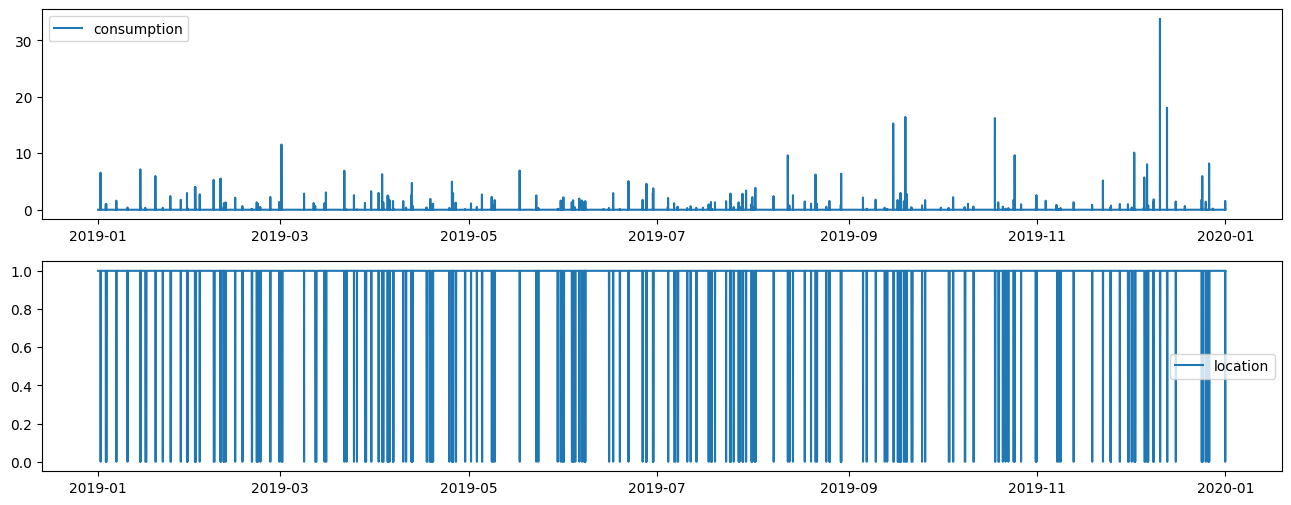

In [39]:
fig, ax = plt.subplots(figsize = (16,6), nrows=2)
ax[0].plot(df_out.iloc[:,0], label = 'consumption')
ax[0].legend()
ax[1].plot(df_out.iloc[:,1], label = 'location')
ax[1].legend()
plt.show()

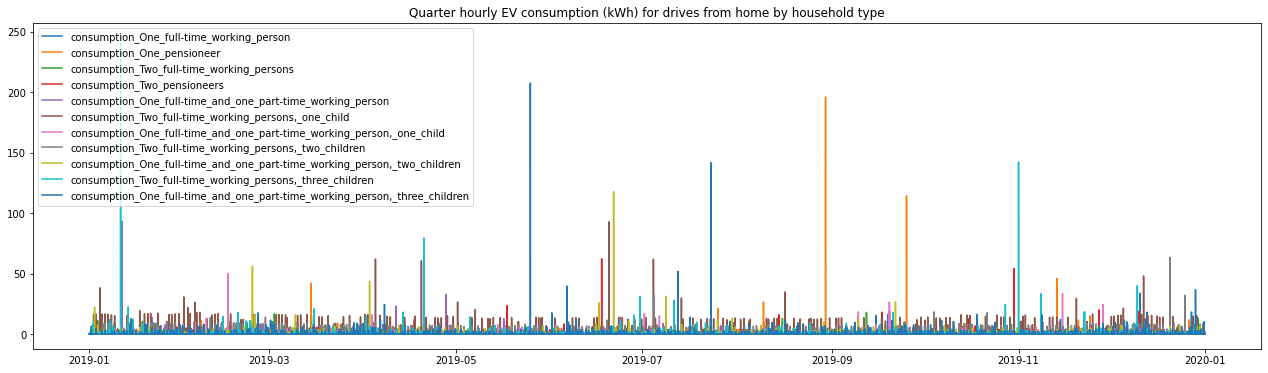

In [17]:
df_out = df
fig, ax = plt.subplots(figsize = (22,6))
for col in df_out:
    if 'consumption' in col:
        ax = plt.plot(df_out[col], label = col)
plt.title('Quarter hourly EV consumption (kWh) for drives from home by household type')
plt.legend()
plt.show()

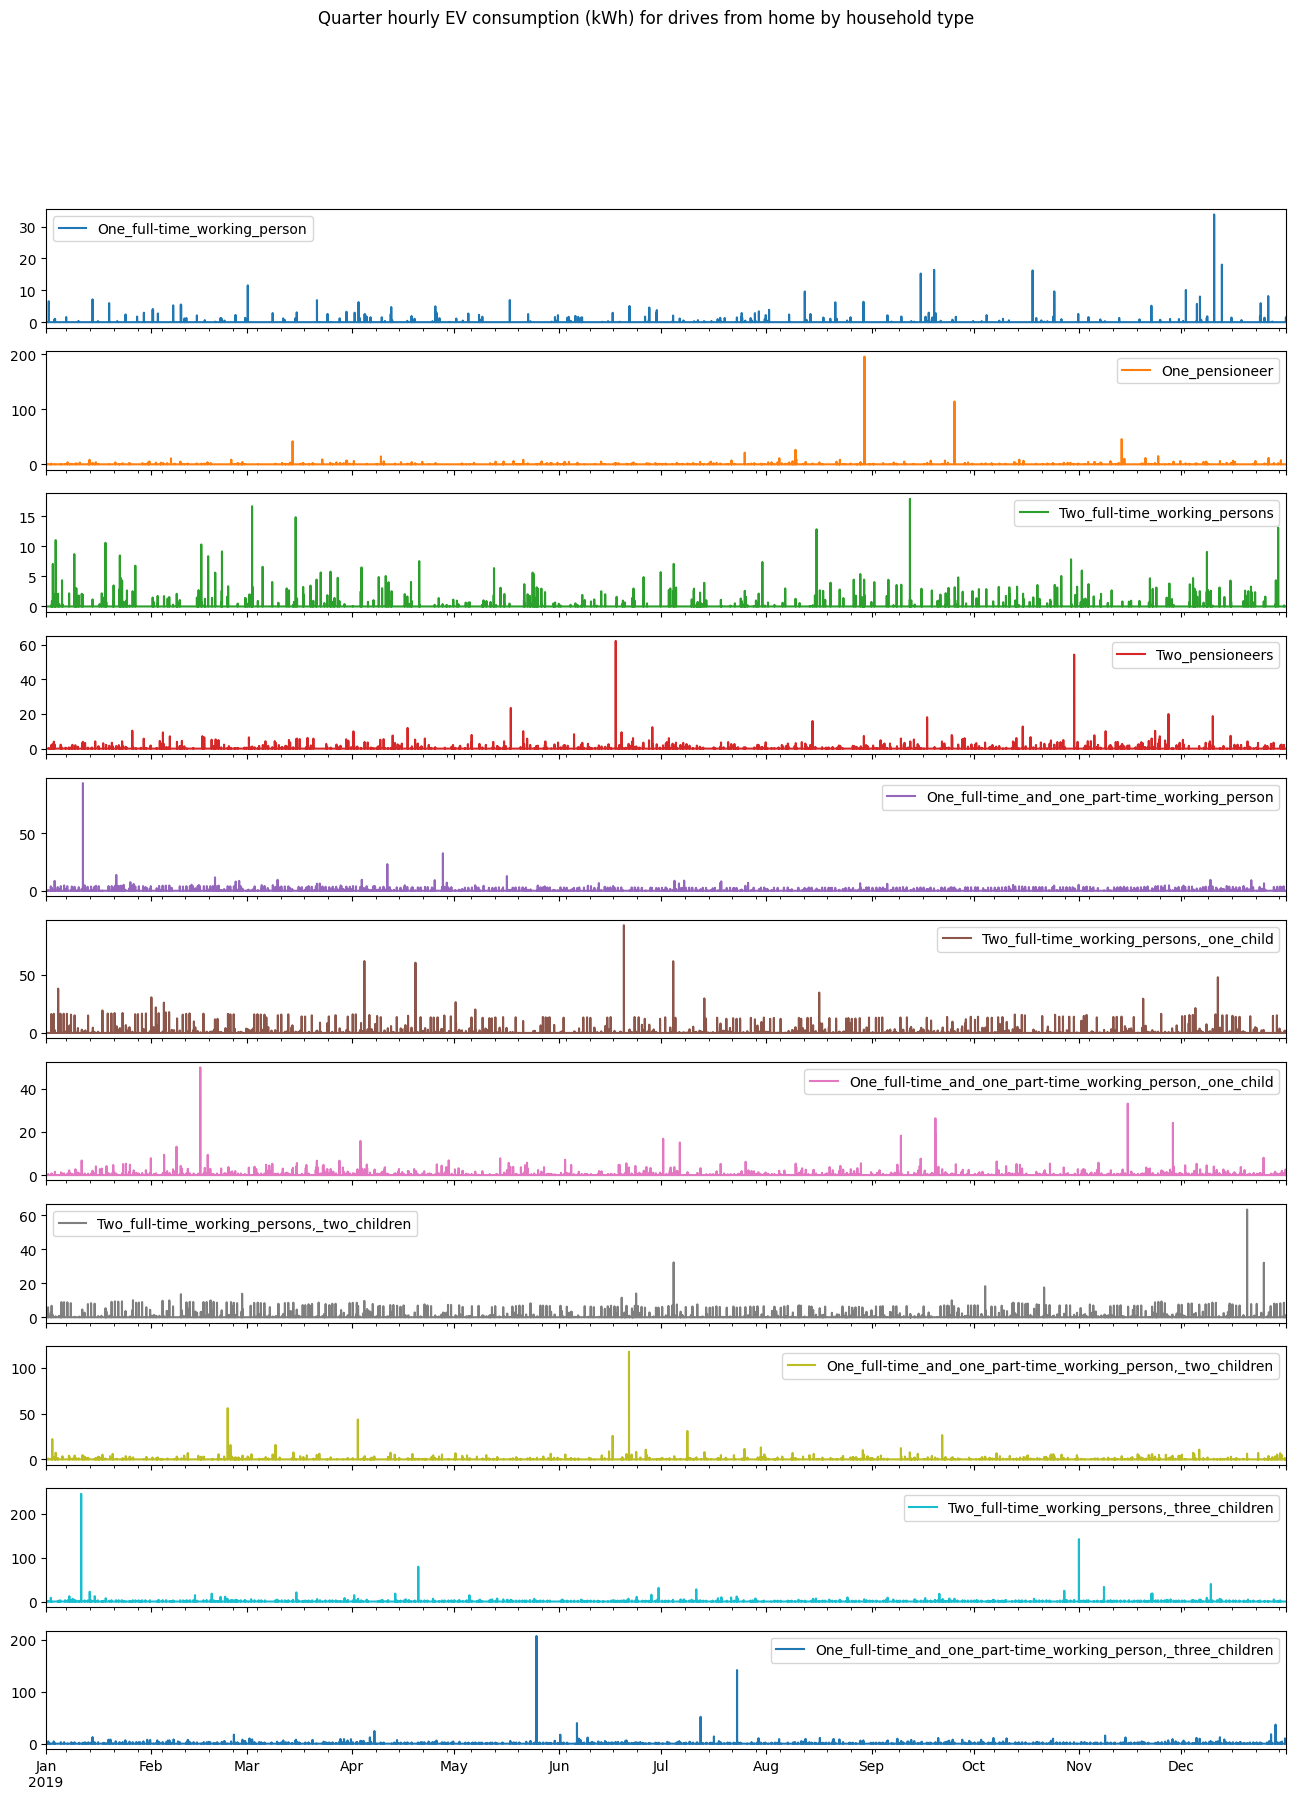

In [200]:
df_out.plot(subplots = True, figsize = (16,20), title = 'Quarter hourly EV consumption (kWh) for drives from home by household type')
plt.show()

In [185]:
df_2[(df_2.index > '2019-01-11 07:25:00') & (df_2.index < '2019-01-11 08:01:00')][10]

,location,consumption,kilometrage
2019-01-11 07:26:00,1,0.0000,0.0
2019-01-11 07:27:00,1,0.0000,0.0
2019-01-11 07:28:00,1,0.0000,0.0
2019-01-11 07:29:00,1,0.0000,0.0
2019-01-11 07:30:00,1,0.0000,0.0
2019-01-11 07:31:00,1,0.0000,0.0
2019-01-11 07:32:00,1,0.0000,0.0
2019-01-11 07:33:00,1,0.0000,0.0
2019-01-11 07:34:00,1,0.0000,0.0
2019-01-11 07:35:00,1,0.0000,0.0


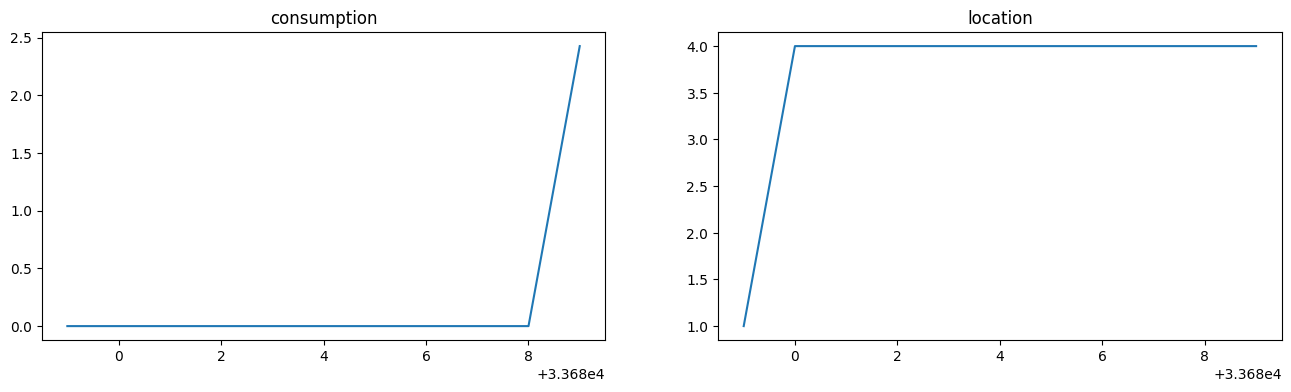

In [88]:
household_nr = 10
t_min, t_max = 33679, 33690
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)
ax[0].plot(df[household_nr, 'consumption'][t_min:t_max], label='consumption')
ax[0].set_title('consumption')
ax[1].plot(df[household_nr, 'location'][t_min:t_max], label='location')
ax[1].set_title('location')
plt.show()

### idea: filter out home charging demand
- ev charging only relevant for household if ev charged at home
- rule: ev is only charged at home when it begins its journey at home
- each spike in demand is at the first time step of the journey
- filter out spikes in demand where location is at home (id_1 == 1) for t-1

In [ ]:
[i for i in range(len(df))]

In [ ]:
df[1, 'location'].plot()

---

## FFE: Residential load profiles

In [7]:
# read in data
link = 'http://opendata.ffe.de:3000/v_opendata?id_opendata=eq.21'
with urllib.request.urlopen(link) as url:
    data = json.loads(url.read())
    #print(data)

In [ ]:
data[0]

In [8]:
# define mapping dictionaries
household_nr = list(range(1, 12))
load_nr = list(range(4))
household_types = ['One full-time working person', 'One pensioneer', 'Two full-time working persons', 'Two pensioneers',
                   'One full-time and one part-time working person', 'Two full-time working persons, one child',
                   'One full-time and one part-time working person, one child',
                   'Two full-time working persons, two children',
                   'One full-time and one part-time working person, two children',
                   'Two full-time working persons, three children',
                   'One full-time and one part-time working person, three children']
household_types = [i.replace(' ', '_') for i in household_types]
load_types = ['Sum', 'Phase_1', 'Phase_2', 'Phase_3']

household_classification = {household_nr[i]: household_types[i] for i in range(len(household_types))}
load_classification = {load_nr[i]: load_types[i] for i in range(len(load_types))}

data exploration

In [9]:
data[0]['data'][5]

{'id_opendata': 21,
 'id_region_type': 35,
 'region_type': 'NUTS-0',
 'id_region': 276,
 'region': 'Germany',
 'year': None,
 'year_weather': 2015,
 'internal_id': [3, 0],
 'internal_id_1': 3,
 'internal_id_2': 0,
 'internal_id_3': None,
 'internal_id_4': None,
 'value': None,
 'values': [0.104076,
  0.100075,
  0.104074,
  0.103073,
  0.104072,
  0.102072,
  0.102071,
  0.10107,
  0.10007,
  0.100069,
  0.098069,
  0.102069,
  0.101068,
  0.099068,
  0.102068,
  0.104068,
  0.102068,
  0.101068,
  0.098068,
  0.100068,
  0.098068,
  0.101068,
  0.098069,
  0.098069,
  0.101069,
  0.09907,
  0.10307,
  0.102071,
  0.098071,
  0.099072,
  0.103072,
  0.102073,
  0.099074,
  0.098074,
  0.102075,
  0.103076,
  0.098077,
  0.104078,
  0.103079,
  0.10008,
  0.179235,
  0.175908,
  0.17549,
  0.175089,
  0.176124,
  0.173092,
  0.177126,
  0.178128,
  0.177972,
  0.179038,
  0.17704,
  0.179041,
  0.176931,
  0.172932,
  0.174715,
  0.173748,
  0.17575,
  0.101105,
  0.104106,
  0.101108,


In [10]:
one_hh = pd.DataFrame(data[0]['data'][5]['values'])
one_hh

,0
0,0.104076
1,0.100075
2,0.104074
3,0.103073
4,0.104072
...,...
525595,0.285455
525596,0.286399
525597,0.286284
525598,0.285388


In [11]:
print('sum', one_hh.iloc[:, 0].sum())
print('mean', one_hh.iloc[:, 0].mean())
print('min', one_hh.iloc[:, 0].min())
print('max', one_hh.iloc[:, 0].max())

sum 130259.0523303
mean 0.24782924720376712
min 0.028
max 9.21565


In [22]:
np.sum([np.sum(one_hh.iloc[:, 0][i:i + 15]) for i in range(0, len(one_hh.iloc[:, 0]), 15)])

2542.188400000001

In [30]:
np.sum(data[0]['data'][3]['values'])

86965.52927839999

In [14]:
# generate df
data_dict = {}
household_ctr = 0
for datapoint in data[0]['data']:
    internal_id_1, internal_id_2 = datapoint['internal_id_1'], datapoint['internal_id_2']
    # aggregate 1min to 15min intervals - divide by 60 because min -> kWh
    data_dict[(household_classification[internal_id_1], load_classification[internal_id_2], f'nr_{household_ctr}')] = [
        np.sum(datapoint['values'][i:i + 15]) / 60 for i in range(0, len(datapoint['values']), 15)]
    household_ctr += 1
df = pd.Series(data_dict).reset_index().sort_values(by=['level_0', 'level_1', 'level_2'])
# rename, reindex df
df.rename(columns={'level_0': 'household_profile', 'level_1': 'load_phase', 'level_2': 'household_nr', 0: 'values'},
          inplace=True)
df.reset_index(inplace=True)
# expand value lists to columns and append for final df
df_vals = pd.DataFrame(df['values'].to_list(), columns=[f'{i}' for i in range(len(df['values'].to_list()[0]))])
df.drop(['index', 'values'], axis=1, inplace=True)
df = pd.concat([df, df_vals], axis=1).set_index(['household_profile', 'load_phase', 'household_nr']).transpose()

In [15]:
os.getcwd()

'C:\\Users\\joche\\FIM Kernkompetenzzentrum\\Paper Agent-based Modeling - Dokumente\\General\\01 Data\\load_profiles'

In [21]:
df.to_excel('FFE_residential_load_profiles.xlsx')

In [22]:
df = pd.read_excel('FFE_residential_load_profiles.xlsx', header=[0, 1, 2], index_col=0)
df.head()

household_profile One_full-time_and_one_part-time_working_person            \
load_phase                                               Phase_1   Phase_2   
household_nr                                               nr_17     nr_27   
0                                                       0.004667  0.013736   
1                                                       0.004833  0.012485   
2                                                       0.004850  0.001000   
3                                                       0.004600  0.001000   
4                                                       0.004567  0.017619   

household_profile                      \
load_phase          Phase_3       Sum   
household_nr          nr_37      nr_7   
0                  0.018715  0.037117   
1                  0.018714  0.036032   
2                  0.018716  0.024566   
3                  0.018721  0.024321   
4                  0.018727  0.040913   

household_profile One_full-time_and_one_part-time_working_person,_one_child  \
load_phase                                                          Phase_1   
household_nr                                                          nr_19   
0                                                             0.0015          
1                                                             0.0015          
2                                                             0.0015          
3                                                             0.0015          
4                                                             0.0015          

household_profile                                \
load_phase          Phase_2   Phase_3       Sum   
household_nr          nr_29     nr_39      nr_9   
0                  0.017543  0.017972  0.037015   
1                  0.015702  0.017972  0.035174   
2                  0.004683  0.017974  0.024157   
3                  0.004933  0.017979  0.024412   
4                  0.019184  0.017985  0.038669   

household_profile One_full-time_and_one_part-time_working_person,_three_children  \
load_phase                                                               Phase_1   
household_nr                                                               nr_23   
0                                                           0.029777               
1                                                           0.030442               
2                                                           0.049009               
3                                                           0.036893               
4                                                           0.031196               

household_profile           ... Two_full-time_working_persons,_three_children  \
load_phase         Phase_2  ...                                       Phase_3   
household_nr         nr_33  ...                                         nr_42   
0                  0.00075  ...                                      0.019791   
1                  0.00075  ...                                      0.032382   
2                  0.00075  ...                                      0.025738   
3                  0.00075  ...                                      0.034766   
4                  0.00075  ...                                      0.026871   

household_profile           Two_full-time_working_persons,_two_children  \
load_phase              Sum                                     Phase_1   
household_nr          nr_12                                       nr_20   
0                  0.038632                                    0.004617   
1                  0.044234                                    0.004433   
2                  0.054716                                    0.004400   
3                  0.048315                                    0.004383   
4                  0.035536                                    0.004817   

household_profile                               Two_pensioneers            \
load

In [24]:
df_residential_loads_kWh = pd.DataFrame()
for type in df.columns.get_level_values(0).unique():
    df_residential_loads_kWh[type] = df[type]['Sum'].iloc[:, 0]
df_residential_loads_kWh

,One_full-time_and_one_part-time_working_person,"One_full-time_and_one_part-time_working_person,_one_child","One_full-time_and_one_part-time_working_person,_three_children","One_full-time_and_one_part-time_working_person,_two_children",One_full-time_working_person,One_pensioneer,Two_full-time_working_persons,"Two_full-time_working_persons,_one_child","Two_full-time_working_persons,_three_children","Two_full-time_working_persons,_two_children",Two_pensioneers
0,0.037117,0.037015,0.031027,0.026565,0.045490,0.011130,0.025384,0.037916,0.038632,0.013793,0.024360
1,0.036032,0.035174,0.031692,0.014833,0.043854,0.011199,0.025051,0.028570,0.044234,0.024146,0.036073
2,0.024566,0.024157,0.050259,0.028941,0.043161,0.025647,0.031577,0.023894,0.054716,0.027266,0.035609
3,0.024321,0.024412,0.038143,0.035957,0.025032,0.014659,0.040364,0.034859,0.048315,0.013588,0.024332
4,0.040913,0.038669,0.032446,0.018022,0.024962,0.011222,0.025447,0.031490,0.035536,0.014028,0.024288
...,...,...,...,...,...,...,...,...,...,...,...
35035,0.035797,0.087516,0.132238,0.061246,0.054537,0.215075,0.131601,0.045017,0.146002,0.089414,0.065759
35036,0.031515,0.090312,0.127854,0.046495,0.090244,0.027910,0.123285,0.046479,0.067952,0.095114,0.037982
35037,0.042035,0.095633,0.060805,0.054618,0.073951,0.011125,0.104564,0.078184,0.048281,0.095646,0.033694
35038,0.024396,0.081871,0.066151,0.049407,0.027262,0.011153,0.051870,0.046631,0.059632,0.113221,0.038217


sanity check: annual kWh per household type

In [25]:
[f'{df_residential_loads_kWh.columns[i]}: {round(df_residential_loads_kWh.iloc[:, i].sum(), 2)}' for i in
 list(range(len(df_residential_loads_kWh.columns)))]

['One_full-time_and_one_part-time_working_person: 2928.34',
 'One_full-time_and_one_part-time_working_person,_one_child: 3372.81',
 'One_full-time_and_one_part-time_working_person,_three_children: 5508.36',
 'One_full-time_and_one_part-time_working_person,_two_children: 4122.96',
 'One_full-time_working_person: 1449.43',
 'One_pensioneer: 1111.83',
 'Two_full-time_working_persons: 2170.98',
 'Two_full-time_working_persons,_one_child: 2309.92',
 'Two_full-time_working_persons,_three_children: 4866.53',
 'Two_full-time_working_persons,_two_children: 3216.66',
 'Two_pensioneers: 2766.3']

In [27]:
os.getcwd()

'C:\\Users\\joche\\FIM Kernkompetenzzentrum\\Paper Agent-based Modeling - Dokumente\\General\\01 Data\\load_profiles'

In [26]:
df_residential_loads_kWh.to_excel('qh_residential_loads_kWh.xlsx')

In [29]:
residential_types = [i for i in df_residential_loads_kWh.columns]
residential_types_total_loads = {}
for res_type in residential_types:
    residential_types_total_loads[res_type] = sum(df_residential_loads_kWh[res_type])
annual_load_df = pd.DataFrame(residential_types_total_loads, index=['annual_load_kWh']).T.sort_values(
    by='annual_load_kWh', ascending=False)

In [30]:
annual_load_df.to_excel('residential_annual_loads_kWh.xlsx')

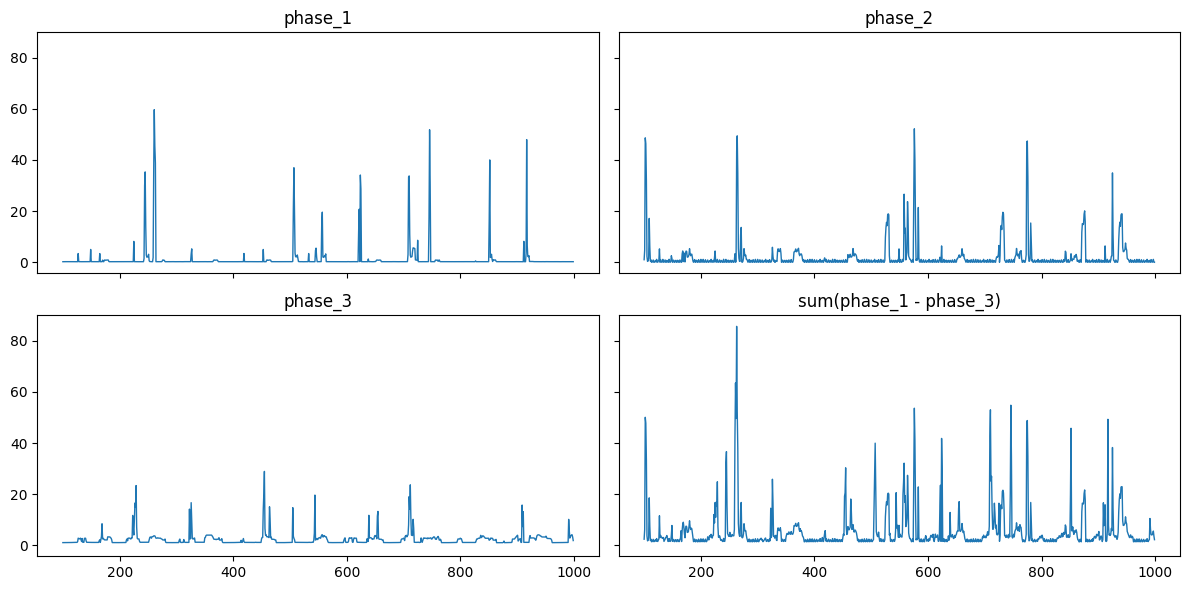

In [22]:
df_ctr = 0
fig, ax = plt.subplots(figsize=(12, 6), nrows=2, ncols=2, sharex=True, sharey=True)
for row in ax:
    for col in row:
        col.plot(df.iloc[100:1000, df_ctr], label=f'phase_{df_ctr + 1}', linewidth=1)
        col.set_title(f'phase_{df_ctr + 1}') if df_ctr < 3 else col.set_title(f'sum(phase_1 - phase_3)')
        df_ctr += 1

plt.tight_layout()
plt.show()